In [1]:
from setting import *

%matplotlib inline

In [2]:
tickers = ['KS11']
names = ['kospi']

In [3]:
data = getHistory(tickers, names)
print('data \n', data)

assets = data.resample('M').last()
assets['CASH'] = pow(1.03, 1/12)
assets['CASH'] = assets['CASH'].shift(1, fill_value=1.0)
assets['CASH'] = assets['CASH'].cumprod()
print('assets \n', assets.head(30))

data 
                   kospi
Date                   
1996-12-11   704.679993
1996-12-12   689.380005
1996-12-13   689.070007
1996-12-16   673.919983
1996-12-17   663.349976
...                 ...
2022-11-24  2441.330078
2022-11-25  2437.860107
2022-11-28  2408.270020
2022-11-29  2433.389893
2022-11-30  2460.800049

[6401 rows x 1 columns]
assets 
                  kospi      CASH
Date                            
1996-12-31  651.219971  1.000000
1997-01-31  685.840027  1.002466
1997-02-28  676.530029  1.004939
1997-03-31  677.340027  1.007417
1997-04-30  703.229980  1.009902
1997-05-31  746.359985  1.012392
1997-06-30  745.400024  1.014889
1997-07-31  726.119995  1.017392
1997-08-31  704.270020  1.019901
1997-09-30  647.109985  1.022417
1997-10-31  470.790009  1.024938
1997-11-30  411.910004  1.027466
1997-12-31  375.149994  1.030000
1998-01-31  558.330017  1.032540
1998-02-28  548.419983  1.035087
1998-03-31  481.040009  1.037640
1998-04-30  421.220001  1.040199
1998-05-31  336.6300

In [9]:
months=13
for i in range(0,months):
    globals()['weights_{}'.format(str(i))] = getWeightByAbsoluteMomentum(assets, i)
    globals()['momentum_{}'.format(str(i))] = Target_Weight_BT(assets, globals()['weights_{}'.format(str(i))], 'momentum_{}'.format(str(i)))

print('weights \n', weights_1.head(30))

momentum 
             kospi  CASH
Date                   
1996-12-31    0.0   0.0
1997-01-31    0.0   0.0
1997-02-28    0.0   0.0
1997-03-31    0.0   0.0
1997-04-30    0.0   0.0
1997-05-31    0.0   0.0
1997-06-30    0.0   0.0
1997-07-31    0.0   0.0
1997-08-31    0.0   0.0
1997-09-30    0.0   0.0
1997-10-31    0.0   0.0
1997-11-30    0.0   0.0
1997-12-31    0.0   0.0
1998-01-31    0.0   0.0
1998-02-28    0.0   0.0
1998-03-31    0.0   0.0
1998-04-30    0.0   0.0
1998-05-31    0.0   0.0
1998-06-30    0.0   0.0
1998-07-31    0.0   0.0
1998-08-31    0.0   0.0
1998-09-30    0.0   0.0
1998-10-31    0.0   0.0
1998-11-30    0.0   0.0
1998-12-31    0.0   0.0
1999-01-31    0.0   0.0
1999-02-28    0.0   0.0
1999-03-31    0.0   0.0
1999-04-30    0.0   0.0
1999-05-31    0.0   0.0
momentum 
                kospi      CASH
Date                          
1996-12-31       NaN       NaN
1997-01-31  0.053162  0.002466
1997-02-28 -0.013575  0.002466
1997-03-31  0.001197  0.002466
1997-04-30  0.038223  0.

In [10]:
index = Buy_n_Hold_BT(data[names[0]].to_frame(), names[0])
report = bt.run(index, momentum_1, momentum_2, momentum_3, momentum_4, momentum_5, momentum_6, momentum_7, momentum_8, momentum_9, momentum_10, momentum_11, momentum_12)

kospi:1996-12-11 00:00:00. Value:100000000, Price:100.0000
1996-12-11 00:00:00
{'selected': ['kospi'], 'weights': {'kospi': 1.0}}


Stat                 kospi       momentum_1    momentum_2    momentum_3    momentum_4    momentum_5    momentum_6    momentum_7    momentum_8    momentum_9    momentum_10    momentum_11    momentum_12
-------------------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------  -------------  -------------
Start                1997-01-31  1997-01-31    1997-01-31    1997-01-31    1997-01-31    1997-01-31    1997-01-31    1997-01-31    1997-01-31    1997-01-31    1997-01-31     1997-01-31     1997-01-31
End                  2022-11-30  2022-11-30    2022-11-30    2022-11-30    2022-11-30    2022-11-30    2022-11-30    2022-11-30    2022-11-30    2022-11-30    2022-11-30     2022-11-30     2022-11-30
Risk-free rate       0.00%       0.00%         0.00%         0.00%         0.00%         0.00%         0.00%         0.00%         0.00%         0.00%         0.00%          0.00%          0.00%



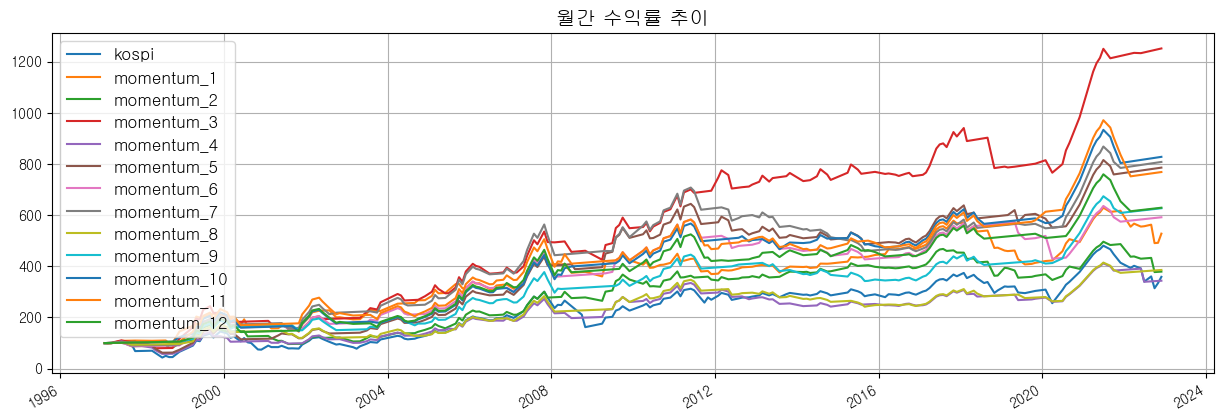

In [14]:
report.plot()
plt.title('월간 수익률 추이')

print(report.display())
print(report.display_monthly_returns())

<AxesSubplot:>

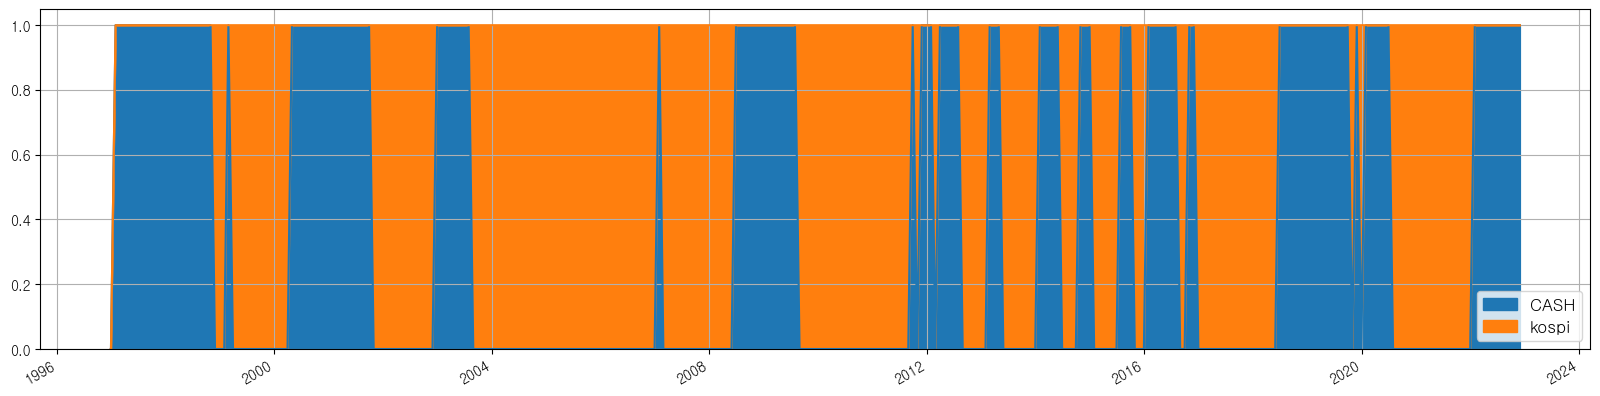

In [14]:
result.backtests['Kospi 1month'].security_weights.plot.area()